# Day 22 Pre-class: Agent-based models and forest fires

### <p style="text-align: right;"> &#9989; Put your name here</p>

In [2]:
# Import important modules! It's always good practice to get your critical imports out of the way.
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random # This module is handy for putting randomness into our models 

![ABM](http://www.sesp.northwestern.edu/files/images/news/2010/05/netlogo-fire-model.jpg)

We'll be discussing agent-based models in this pre-class assignment and exploring how agent-based models can be used to study how forest fires spread.

**Important note**: This pre-class assignment is a bit longer than others but much of it involves reading the text, watching videos and exploring an online agent-based model. That said, you should still start it sooner than later so that you have plenty of time to work on the coding part at the end!

### Goals for today's pre-class assignment

In this pre-class assignment, you will: 

* Learn about Agent-Based Models (ABMs).
* Explore a Forest Fire model using the web-based version of NetLogo (we will be programming this in Python in class).
* Work with two-dimensional NumPy arrays to create our initial ABM environment.

### Assignment instructions

**This assignment is due by 11:59 p.m. the day before class** and should be uploaded into the appropriate "Pre-class assignments" submission folder.  If you run into issues with your code, make sure to use Slack to help each other out and receive some assistance from the instructors. Submission instructions can be found at the end of the notebook.

**Note: If you want to get some more practice with using NumPy, there are some extra exercises at the end of this notebook, but they are not required to receive credit for the assignment.**

___
# Part 1:Agent-based models (ABM)

In this assignment and the next, we are going to embark on a new technique for modeling called "agent-based models", or ABMs for short. To give you a bit of background, watch the following short video.

(**Note**: there is a bit in this video about the NetLogo code, which is designed to run ABMs. You'll actually test out a web-based version of NetLogo, but don't worry about having to code anything with NetLogo. We'll be using Python!)

If the YouTube video doesn't work, try this [MediaSpace link](https://mediaspace.msu.edu/media/Agent+Based+Modeling/1_fdxihb0j).

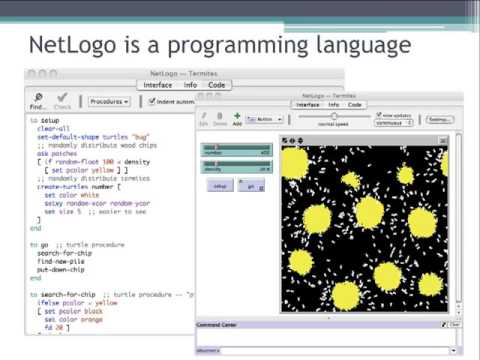

In [3]:
# watch a video about the Agent-Based Model 
from IPython.display import YouTubeVideo 
YouTubeVideo("XB4e-3nws1g",width=640,height=360)

## More details about agent-based models

In the most basic sense, an agent-based model is one in which there is a universe of _things_ that _do stuff_. For example, when we were modeling the spread of zombies, we originally considered a model in which some fraction of the population were zombies or infected or in some other state. As time passes, the change in the fraction residing in each state varies depending on all the fractions. In an agent-based model, rather than consider fractions, we consider *individual agents*; **that is, we would follow single zombies as they infect other agents.** Agent-based models can thereby capture important spatial relationships that are obscured in other models.

ABMs are among the most powerful and easy to use computational models. Their ease of use stems from the fact that they are built on **rules**: if you can specify what the rules are in terms of code, it is not necessary to formulate your model directly in terms of equations (which is not always easy to do). 

We can understand the original motivation of using ABMs by thinking about the term "agent". The idea was that there were entities, think of people, companies/markets or governments, that have ideas or opinions that can be influenced by other agents. If we can build into each agent all of its behaviors, we can then allow the agents to interact with each other to see what behaviors emerge. 

ABMs originated in the field of computational sociology. There were fairly strict definitions of what an agent was; it needed to have these four traits:
1. autonomy - ability to act on its own
2. social ability - can interact with other agents
3. reactivity - reacts to both other agents and the environment
4. proactivity - has some sort of belief system; or, has its own goals

Today, the term "ABM" has nearly lost its meaning because of its wide use (or, perhaps, *mis*use). It would be clunky to account for the complexities of a human in a compartmental model as there are many attributes of a human (eg. age, height, number of friends, politcal beliefs, medical history, etc). But, if we define each agent to be an **individual** person, we can sample from known distributions (e.g., age, height, health status) to assign statistical behavior to that person (e.g., using census data). 

---
# Part 2: Modeling a Forest Fire using an Agent-Based Modeling (ABM)

We're going to make our first foray into ABMs by modeling a forest fire. 

### Why model forest fires?

While this isn't a huge problem in Michigan, the _states in the western United States having been suffering a tremendous problem with difficult-to-control forest fires_.  This comes from a combination of extended drought conditions, dense woodlands, and forest management policies that suppress small fires and thus ensure that large quantities of dead, dry trees and brush are available to burn when a large fire inevitably starts.  In recent years, this has been exacerbated by climate change, which has both caused drought conditions to be more severe and allowed tree-killing diseases and insects to flourish, which produces more dead, easily-burned wood.

These forest fires destroy ecosystems and peoples' homes and other property, and can result in the loss of human and animal life.  A key challenge in forest management is to attempt to contain these huge forest fires once they start. To that end, it is critical to have models of how fire spreads in various conditions; see, for example, the [Open Wildland Fire Modeling group](https://wiki.openwfm.org/wiki/Open_Wildland_Fire_Modeling_E_community_Wiki).


---
# Let's try the model!

Before we try to implement this model in Python, let's get a feel for how the model works.  We're going to do this using the web-based version of [NetLogo](https://ccl.northwestern.edu/netlogo), which is a programming language built for running agent-based models. Let's get started:

**Click this link to access the model**: [Web-based NetLogo Fire model](http://netlogoweb.org/launch#http://netlogoweb.org/assets/modelslib/Sample%20Models/Earth%20Science/Fire.nlogo). 

**Running the model:**  The only parameter that you can vary is "density", which is the fraction of cells that contain trees (and thus the density of trees in the forest).  You can drag the slider back and forth to change the density.  After you do that, click the "setup" button and then click "go".

**What do you observe?**  Try setting the "density" value to various numbers between 0 and 99, and see how the wildfire spreads.  What happens when the value is low versus when it is high?  Is there any particular value where the behavior changes very rapidly as you change the density of trees?  If so, try to home in on that number and report it below.

<font size="+3">&#9998;</font> *<50 nothing burns, >70 everything burns*

---
# Part 3: Setting up our forest fire model

In class we'll be implementing the code for our forest fire model. In order to do this, we'll need code that's capable of plotting a 2D NumPy array, as well as code that will set up our initial forest and the start of our fire. This is what you'll work on in this pre-class assignment, so that we can work on coding up the rules of the model in class.

Our forest will be represented by a two-dimensional, square array with sides that are N cells long. The cells in the array can have three values: __0 (empty), 1 (trees), and 2 (on fire)__.  At the beginning of the model, a user-specified fraction of the cells $\mathrm{f_{trees\_start}}$ (which is equivalent to the NetLogo `density` parameter) are randomly filled with trees, and the remaining cells are empty.  To start out, one edge of the board (say, the entire leftmost column) is set on fire.

### 3.1 Setting up the Plotting Function

In the cell below, we provide a function that takes an _array as an input_ and _generates a plot_ using the  `plt.plot()` function (as opposed to `plt.imshow()`).  We have chosen  to have a __value of zero (0) represented by an empty cell, a one (1) to be represented by a green triangle, and a (2) to be represented by a red square__ in this plot.  

Make sure you understand how this code works as we will be using it a lot!

**Note**: This function uses a NumPy function that you might not have seen yet, `meshgrid`. The documention for `meshgrid` is here: https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html. Essentially, `meshgrid` takes one-dimensional arrays and creates new multi-dimensional arrays made up of the values from the one dimensional arrays. In the code below, for example, `meshgrid` takes the x and y values and creates two, new 2D arrays with the x and y values filling the arrays. You might need to experiment with meshgrid a bit on your own to understand how it works.

In [4]:
# function plotgrid() takes in a 2D array and uses matplotlib to make a plot.
# this function returns no values!

def plotgrid(myarray):
    
    # first create two vectors based on the x and y sizes of the grid
    x_range = np.linspace(0, myarray.shape[1]-1, myarray.shape[1]) # x means horizontal!
    y_range = np.linspace(0, myarray.shape[0]-1, myarray.shape[0]) # y means vertical!
    
    # use the numpy meshgrid function to create two matrices 
    # of the same size as myarray with x and y indexes
    x_indexes, y_indexes = np.meshgrid(x_range, y_range) 
    
    # make a list of all the x and y indexes that are either squares or triangles.
    # the notation below is relatively new to us; it means that when myarray==(value),
    # only record those values. 
    tr_x = x_indexes[myarray == 1]; 
    tr_y = y_indexes[myarray == 1];
    sq_x = x_indexes[myarray == 2]; 
    sq_y = y_indexes[myarray == 2];
    
    # plot the squares and triangles.  make the size of the polygons 
    # larger than the default so they're easy to see!
    # Note: we have to reverse the y values to make sure it plots with the right orientation
    plt.plot(tr_x,  myarray.shape[0] - tr_y - 1, '^g',markersize=20)
    plt.plot(sq_x,  myarray.shape[0] - sq_y - 1, 'rs',markersize=20)
    
    # Set the x and y limits to include half a space overlap so we don't cut off the shapes
    plt.ylim([-0.5,myarray.shape[0] + 0.5]) 
    plt.xlim([-0.5,myarray.shape[1] + 0.5])
    
    # Turn the axes off
    plt.axis('off')

### Now, let's test this plotting function!

It's always a good idea to test a new function. We'll create random forest pre-populated with  0s, 1s, and 2s using NumPy's `randomint` function, which generates random integers.

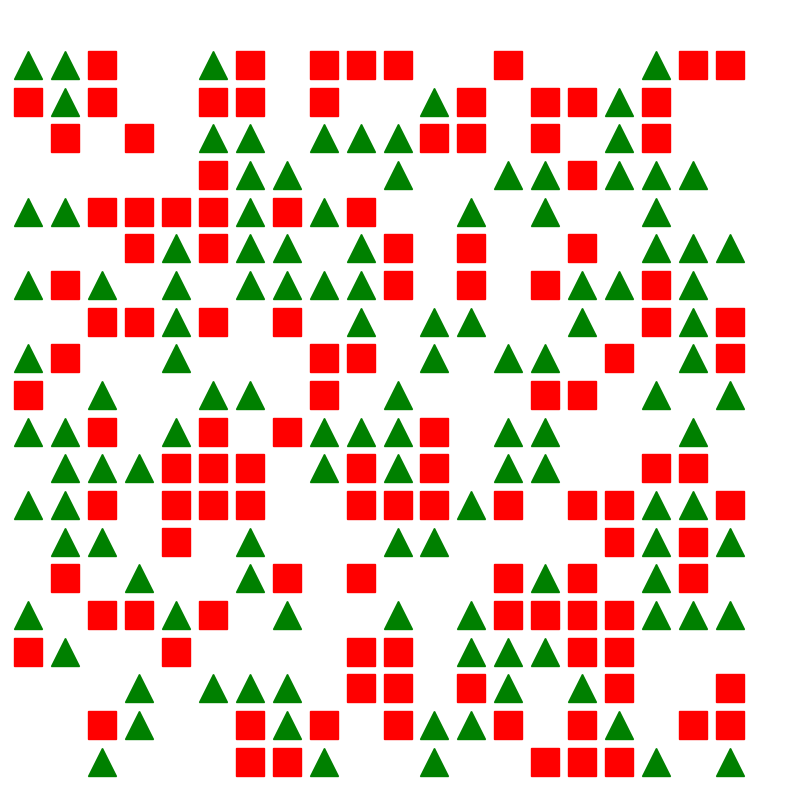

In [5]:
# Generate a random grid of points, distributed uniformly between 0, 1, 2
# Note that the high value we give the function is 3 because the the range is 0, inclusive, to 3, exclusive.
forest_array = np.random.randint(0,3,size=[20,20]) 

# Create a figure and set the figure size so it doesn't look too crowded.
# Try commenting it out to see what happens!
# Note that if you expanded it to a larger forest size, you may need to change the marker size
# and figure size to make things look good.
fig = plt.figure(figsize=(10,10)) 

# now make a plot.
plotgrid(forest_array)

### Making an animation
So far, so good! Finally, we are going to animate a loop of plots using a dynamic display trick.

&#9989;&nbsp; Complete the following code (by replacing the "__" spots) and see if you can make sense of what the code is doing. This is very similar to the previous code block. In this example, we keep making a new random forest **10** times while pausing a half second between each forest. For your forest fire model, you'll be plotting the new state of your forest as the fire spreads.

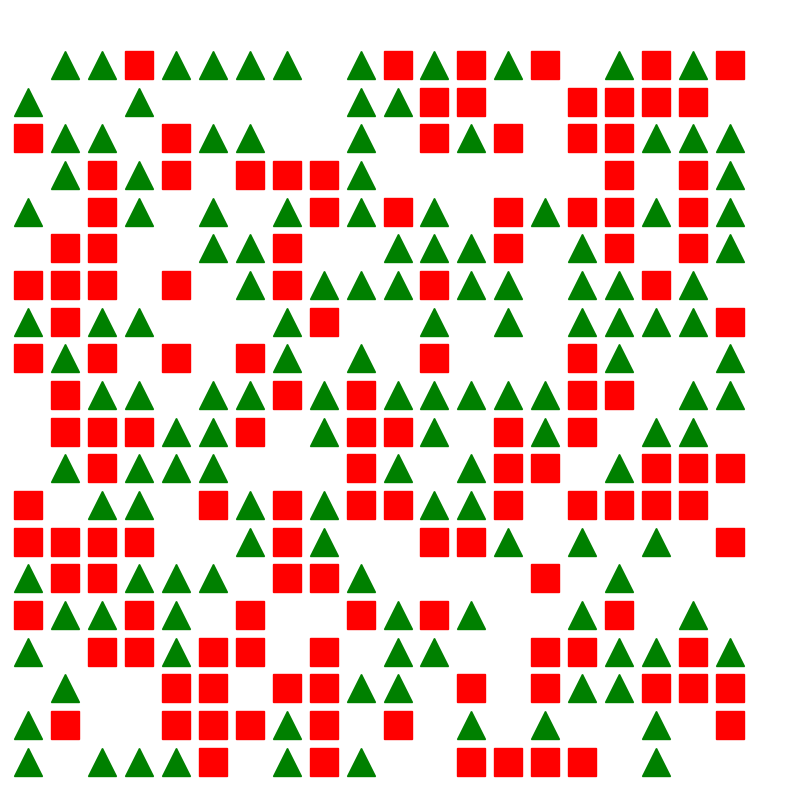

In [6]:
# This lets us make and clear plots without creating new ones
from IPython.display import display, clear_output

# We can use this to have images show up with some user-specified spacing in time
import time 

# Create a figure
fig = plt.figure(figsize=(10,10))

# Run animation for 10 iterations
for i in range(10): 
    
    # Generate the random neighborhood, as in previous cells
    myarray = np.random.randint(0,2,size=[20,20]) # range from 0 to 2
    
    # Put display code here
    forest_array = np.random.randint(0,3,size=[20,20]) 

    plotgrid(forest_array)   
    
    # Animation part 
    time.sleep(0.5)         # Sleep for half a second to slow down the animation
    clear_output(wait=True) # Clear output for dynamic display
    display(fig)            # Reset display
    fig.clear()             # Prevent overlapping and layered plots

plt.close()                 # Close dynamic display

---
## Part 3.2: An aside on random number generators

Some of the code above uses the random number generator from NumPy. There is also a `random` module in standard Python that can create random numbers. You might have already come across these random number generators at some point in this course.

It turns out that the random number generators available on computers aren't truly random, they're actually "pseudo-random." This is because the random number generators use mathematical algorithms to produce numbers that _seem_ random, but they are actually produced in a predictable and reproducible way based on the "seed" number that is given to the random number generator. This means that if we need to produce the same set of random numbers every time they are generated, we can define a specific seed number and use that to generate the numbers. If we want our random numbers to keep changing, we just let the computer pick the seed.

&#9989;&nbsp; **Watch the video below to learn how to use the `random` module in NumPy.**

If the YouTube video doesn't work, try this [MediaSpace link](https://mediaspace.msu.edu/media/random+numbers/1_0ico6hit).

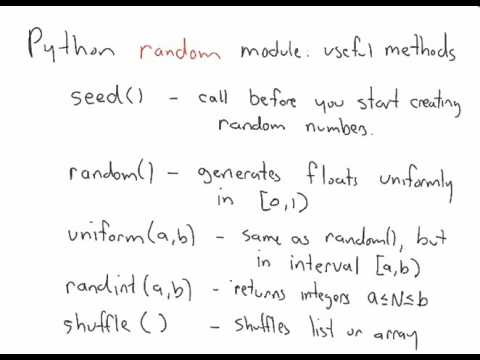

In [7]:
from IPython.display import YouTubeVideo 
YouTubeVideo("fF841G53fGo",width=640,height=360) # Random numbers

&#9989;&nbsp; **In the cell below, test out the following random number generators in Python**:

* Use the `random` function from the `random` module (i.e. `random.random()`) to print a random number between zero and one.
* Use the `randint` function from the `random` module to print a random integer between 0 and 10.

Run the cell a few times to get a sense for the random numbers that are generated and confirm that they change every time you run the cell.

In [8]:
# Print your random numbers here
random.randint(1,10)

9

---
## Part 3.3: Coming back to setting up our "forest"

The final step we want to figure out before we get to class is how to set up our forest so that we can model the spread of fire. Remember, we want the forest to be an NxN square where __0 is "empty", 1 is "tree", and 2 is "fire".__ The "density" of the forest or fraction of the forest initially covered in trees, $f_{tree\_start}$, should be defined by the probability that a given cell starts off with a tree in it. Start off the board so that the leftmost column of the board is initialized to be "on fire"!

&#9989;&nbsp; **Task**: Write a function that creates the initial forest. The function should _take in the size of the forest ($N$) and the probability that a given cell will contain a tree, $f_{tree\_start}$,_ and then _return the forest_. Test out your function by plotting your forest array after you create it!

*Hint*: The `np.zeros` function is a great way to initialize a 2D array full of zeros.

*Another hint*: Once you've created an array of zeros, you should loop over all of the cells (all of the indices) in the array and decide if a tree should go in the cell. When you're done doing that, go back and set the leftmost column to be on fire!

*Final hint*: To decide if a tree should exist in a cell, you can pick a random number between 0 and 1, and if the number is less than the value of $f_{tree\_start}$, put a tree in the cell. If it's higher, don't put a tree there.


As an example, to loop through all of the cells in your 2D array and set the values equal to 1, you might do something like this:

```
# Loop over the rows
for r in range(board.shape[0]):
    # Loop over the columns
    for c in range(board.shape[1]):
        board[r,c] = 1
```

We commonly use `i` and `j` as our indices instead of `r` and `c`, which would look something like this:

```
# Loop over the rows
for i in range(board.shape[0]):
    # Loop over the columns
    for j in range(board.shape[1]):
        board[i,j] = 1
```

Here's a visual reminder of how we can think about **indexing** a 2D array. You can see a nested for loop: for a single value of the index i, we loop through all the values of the index j. We repeat this process for all the values of i. _The index values are in the top left of each box, whereas the value is in the center._ The values and colors are an example to help you visualize what the ending forest could look like:

<img src=https://media.giphy.com/media/srIJhByNomwwZgs7Uq/giphy.gif width="600" height="400" align="center">

&#9989;&nbsp; **Task**: Before you code, think back to the gif that was placed in Day 03 PCA to help you understand the flow of a single for loop. 
- What similarities are there between a single for loop and the nested for loop as far as the execution of the code? 
- How would you explain what "loop through all the cells in your 2D array" means to someone who has never taken a coding class? Make sure to explain the difference between the index of the cell and the value of the cell. 
 

<font size="+3">&#9998;</font>*Put your answers here.*

In [33]:
# Define your "create_forest" function that takes in the value of "N"
# and the value of "ftreestart" and returns the forest array
def create_forest_fire(N,ftreestart):
    

    # Initialize a 2D array full of zeros using np.zeros
    board = np.zeros((N,N))
    # Loop through the 2D array to initialize the trees
    for i in range(N):
        for j in range(N):
            if random.random() < ftreestart:
                board[i,j] = 1
    board[:,0] = 2
    return board
    # (this will be require a pair of nested loops to loop over all of the index values)
    # To determine if a tree should go there, pick a random number between 0 and 1,
    # if it's less than ftreestart, put a "tree" there
    
    #Finally, go back and set the entire first column to be "on fire" using array indexing with a ":"
    
    #Make sure you _return_ your new board!

In [35]:
# Put some code here to test your new create_forest function and plot the result
create_forest_fire(10,.9)

array([[2., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [2., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [2., 1., 1., 1., 1., 1., 1., 0., 1., 1.],
       [2., 1., 1., 1., 1., 1., 0., 1., 1., 1.],
       [2., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [2., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [2., 1., 1., 0., 1., 1., 1., 1., 1., 1.],
       [2., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [2., 1., 1., 0., 1., 1., 1., 1., 1., 1.],
       [2., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

---
## Assignment wrap-up
Please fill out the form that appears when you run the code below. You must completely fill this out in order to receive credit for the assignment!

In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://cmse.msu.edu/cmse201-pc-survey" 
	width="800" 
	height="600" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### Congratulations, you're done!

Submit this assignment by uploading it to the course D2L web page.  Go to the "Pre-class assignments" folder, find the appropriate submission link, and upload it there.

If you have the time and want some practice with 2D NumPy arrays, feel free to work with the cells below. This practice may be useful for some of the work that we're going to do with agent-bsed models. **It is not required** that you complete this part of the assignment. You might even just want to make a note to come back and look at this at a later time.

___
___
# Extra information about and practice with 2D NumPy arrays

Modeling ABMs will require using 2D NumPy array, _a lot_. We will be doing a variety of things with 2D arrays, including array slicing, populating them with random numbers, and making plots of them. Here are a number of exercises to get more familiar with using NumPy array, if you think you need a bit of practice. Again, these exercises are for your benefit, but are not required to get credit for the pre-class assignment.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random

---

## Array creation and basic properties

### a.
The line below creates an 8x10 array of zeros called ```my_array```.  Note that you can do this with any numpy array method (```ones```, ```zeros_like```, ```ones_like```, etc.).  See [this page](http://docs.scipy.org/doc/numpy/reference/routines.array-creation.html) for a full list of routines for array creation.  You can also specify the array data type (float, int, etc.) by using the `dtype` argument, i.e., `dtype='float'` or `dtype='int'`.  By default, Numpy creates arrays of floating-point numbers.

In [ ]:
# example 
a = np.zeros([8,10],dtype='int')
print("new array:\n", a)

In [ ]:
# now your turn: try creating 4x12 array of zeros of type float 


### b. 
Previously in class, you might have already created a 1D NumPy array of predetermined values by giving the ```np.array``` a list.  You can make a multidimensional NumPy array by giving  ```np.array``` a set of nested lists (i.e., a list of lists).  The following will create a $3\times 3$ array with predetermined values:

In [11]:
b = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(b)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


### c.
The array `.shape` property tells you how large the array is in each dimension, `.ndim` tells you the number of dimensions, and `.size` tells you the total number of elements in the array. You can access each of the dimensions dim by `.shape[dim]`.

In [ ]:
print("the shape of this array is:", a.shape)
print("there are:", a.ndim, "dimensions")
print("there are", a.size, "total elements")

for i in range(a.ndim):
    print("the size of dimension", i, "is", a.shape[i])

### d. 
You can manipulate individual cells of a 2D array by:

```a[index_1,index_2]```

Note that when you print it, the first index corresponds to rows (counting down from the top) and the second index corresponds to columns (counting from the left).  Indices in both directions count by zeros.

In [ ]:
a[2,6]=11

#print entire array
print(a)

#print a single element of the array
print(a[2,6])

---
## Slicing arrays 

You can also use the same type of slicing that you use with lists; in other words, python allows you to select some subset of the elements in a list or an array to manipulate or copy.  With slicing, there are three values that can be used along each dimension: `start`, `end`, and `step`, separated by colons.  

### Here are some examples in 1D:

```
myarray[start:end]   # items start through end-1
myarray[start:]      # items start through the end of the array
myarray[:end]        # items from the beginning of the array through end-1
myarray[:]           # a copy of the whole array
myarray[start:end:step]  # every "step" item from start to end-1
myarray[::step]      # every "step" item over the whole array, starting with the first element.
```

Note that negative indices count from the end of the array, so `myarray[-1]` is the last element in the array, `myarray[-2]` is the second-to-last element, etc.  You can also reverse the order of the array by starting at the end and counting to the beginning by negative numbers; in other words, `myarray[-1::-1]` starts at the end of the array and goes to the first element by counting down by one each time.

In [ ]:
import numpy as np

In [ ]:
# create a 1D array with values 0...10
c = np.arange(0,10)

# Put your code below; if the above explanation is not enough to help you do the following, feel free to Google it 

print(
#1. print the whole array
    c,
#2. print out some elements from the middle of the array
    c[2:5],
#3. print the second element through the second-to-last element
    c[1:-1],
#4. print the first half of the array 
    len(c)//2,
    c[:len(c)//2],
#5. print the second half of the array
    c[len(c)//2:],
#6. print every other element from 2-8 (inclusive)
    c[2:9:2],
#7. print every third element in the array
    c[::3],
#8. reverse the array
    c[::-1]
)

[0 1 2 3 4 5 6 7 8 9] [2 3 4] [1 2 3 4 5 6 7 8] 5 [0 1 2 3 4] [5 6 7 8 9] [2 4 6 8] [0 3 6 9] [9 8 7 6 5 4 3 2 1 0]


### 2D Cases
The same sort of technique can be used with a multidimensional array, with `start`, `stop`, and (optionally) `step` specified along each dimension, with the dimensions separated by a comma. The syntax would be:
`my2Darray[start1:stop1:step1, start2:stop2:step2]`
with the same rules as above. You can also combine slicing with fixed indices to get some or all elements from a single row or column of your array.
For example, array `b` created above is a $3\times 3$ array with the values 1–9 stored in it. We can do several different things:
```
b[0,:]     # get the first row
b[:,2]     # get the third column
b[1,::2]   # get every other element of the first row, starting at element 0
b[:2,:2]   # get a square array containing the first two elements along each dimension
b[-2:,-2:] # get a square array containing the last two elements along each dimension
b[::2,::2] # get a square array of every other element along each dimension
b[-1::-1,-1::-1]  # original-size array, but reversed along both dimensions
```

In [22]:
# Put your code below; if the above explaination is not enough to help you do the following, feel free to Google it 
print(
    b,

# print the first row
    b[0,:],
# print the third column
    b[2,:],
# print every other element of the second row, starting with element 0
    b[1,::2],
# print square array of first two elements along each dimension
    b[:2,:2],
# print reversed array
    b.transpose()
)

[[1 2 3]
 [4 5 6]
 [7 8 9]] [1 2 3] [7 8 9] [4 6] [[1 2]
 [4 5]] [[1 4 7]
 [2 5 8]
 [3 6 9]]


---
## Copying arrays

So far, we've only shown you how to create arrays and manipulate subsets of arrays.  But what about copying arrays?  What happens when you create an array `c`, and set `d=c`?

In [23]:
c = np.full((4,4),10.0)  # makes an array of shape (4,4) where all elements are value 10.0

d = c

print("c:\n",c, "\nd:\n", d)

c:
 [[10. 10. 10. 10.]
 [10. 10. 10. 10.]
 [10. 10. 10. 10.]
 [10. 10. 10. 10.]] 
d:
 [[10. 10. 10. 10.]
 [10. 10. 10. 10.]
 [10. 10. 10. 10.]
 [10. 10. 10. 10.]]


The two arrays are the same, which is what you would expect. But what happens if we make changes to array `d`?

In [24]:
d[:,0] = -1.0  # make column 0 equal to -1
d[:,2] = -6.0  # make column 2 equal to -6

print("c:\n",c, "\nd:\n", d)

c:
 [[-1. 10. -6. 10.]
 [-1. 10. -6. 10.]
 [-1. 10. -6. 10.]
 [-1. 10. -6. 10.]] 
d:
 [[-1. 10. -6. 10.]
 [-1. 10. -6. 10.]
 [-1. 10. -6. 10.]
 [-1. 10. -6. 10.]]


Arrays c and d are identical, even though you only changed d!

_So what's going on here?_ When you equate arrays in Numpy (i.e., d = c), you create a reference, rather than copying the array -- in other words, the array d is not a distinct array, but rather points to the array c in memory. Any modification to either c or d will be seen by both. To actually make a copy, you have to use the **np.copy()** method (we did this in the class before):

In [25]:
e = np.full((4,4),10.0)  # makes an array of shape (4,4) where all elements are value 10.0

f = np.copy(e)

f[:,0] = -1.0  # make column 0 equal to -1
f[:,2] = -6.0  # make column 2 equal to -6

print("e:\n",e, "\nf:\n", f)

e:
 [[10. 10. 10. 10.]
 [10. 10. 10. 10.]
 [10. 10. 10. 10.]
 [10. 10. 10. 10.]] 
f:
 [[-1. 10. -6. 10.]
 [-1. 10. -6. 10.]
 [-1. 10. -6. 10.]
 [-1. 10. -6. 10.]]


#### Copy a subset of an array:

In [26]:
g = np.full((4,4),10.0)  # makes an array of shape (4,4) where all elements are value 10.0

h = np.copy(g[0:2,0:2])

print("g:\n",g, "\nh:\n", h)

g:
 [[10. 10. 10. 10.]
 [10. 10. 10. 10.]
 [10. 10. 10. 10.]
 [10. 10. 10. 10.]] 
h:
 [[10. 10.]
 [10. 10.]]


---
## Numpy and random numbers

We talked about random number generators earlier in the assignment, but used the `random` module. NumPy has similar functions: 

* [```random```](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.random.html#numpy.random.random), which generates an array with user-specified dimensions (1D, 2D, or more dimensions) and fills it with random floating-point values in the interval $[0,1)$.
* [```randint```](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html#numpy.random.randint), which generates an array with user-specified dimensions and fills it with random integers in a user-specified interval.

Try generating a 5x5 array of random integers below.

In [ ]:
# Generate a 5 by 5 array of random integers and print it out 


---

## Plotting 2D numpy arrays

It's easy to plot 2D Numpy arrays in matplotlib using the pyplot [`matshow`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.matshow) method. 

(See [this page](http://stackoverflow.com/questions/16492830/colorplot-of-2d-array-matplotlib) for a more complex example.)  Finally, you can use the pyplot [`imshow`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.imshow) method to control many aspects of a plotted array, including things like the [color map](http://matplotlib.org/examples/color/colormaps_reference.html), opacity, and the minimum and maximum range.

In [ ]:
new_rand_array = np.random.random((100,100))

plt.matshow(new_rand_array)


### More useful links:

* [Numpy quickstart](https://numpy.org/doc/stable/user/quickstart.html)
* [A useful numpy tutorial](http://cs231n.github.io/python-numpy-tutorial/#numpy)
* [Numpy array creation methods](http://docs.scipy.org/doc/numpy/reference/routines.array-creation.html)
* [Numpy array slicing/indexing tutorial](http://cs231n.github.io/python-numpy-tutorial/#numpy-array-indexing)
* [Numpy array slicing and indexing techniques](http://docs.scipy.org/doc/numpy/reference/arrays.indexing.html) (more extensive documentation)
* [The Numpy random module](https://numpy.org/doc/stable/reference/random/index.html)